<a href="https://colab.research.google.com/github/iambikash378/DLforSatelliteImagery/blob/main/satelliteimagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git config --global user.email "077bei015.bikash@pcampus.edu.np"
!git config --global user.name "iambikash378"

In [ ]:
!git clone https://github.com/iambikash378/DLforSatelliteImagery.git

Cloning into 'DLforSatelliteImagery'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
%cd /content/DLforSatelliteImagery

/content/DLforSatelliteImagery


In [ ]:
!git add .

In [ ]:
!git commit -m "process, patchify, normalize and processing masks"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


unknown option: -v
usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | -P | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           [--super-prefix=<path>] [--config-env=<name>=<envvar>]
           <command> [<args>]


In [ ]:
!pip install patchify

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# List out all the contents of the dataset. Here -l means long, -a means all files and -h means human readable

!ls -lah '/content/drive/MyDrive/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 1'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 2'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 3'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 4'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 5'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 6'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 7'
drwx------ 2 root root 4.0K Jun 17 17:04 'Tile 8'


In [ ]:
minmaxscaler = MinMaxScaler()


In [ ]:
root_folder = '/content/drive/MyDrive/Semantic segmentation dataset'

In [ ]:
# os.walk(root_folder) returns the paths of sub directories and  files

for path, subdirs, files in os.walk(root_folder):
  dir_name = path.split(os.path.sep)[-1] # gives us the directory name
  #if dir_name == "images":
    #images = os.listdir(path)
    #for imagename in images:
      #if (imagename.endswith('.jpg')):
        #print(imagename)
  if dir_name == "masks":
    masks = os.listdir(path)
    print(path)



/content/drive/MyDrive/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 2/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 6/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 5/masks
/content/drive/MyDrive/Semantic segmentation dataset/Tile 8/masks


In [ ]:
patch_size = 256

In [ ]:
image = cv2.imread(f'{root_folder}/Tile 1/images/image_part_001.jpg',1)  # 1 reads the image as RGB, 0 as grayscale

In [ ]:
print(image.shape)

(644, 797, 3)


In [ ]:
#print(type(Image.fromarray(image)))

In [ ]:
image_patches = patchify(image, (patch_size, patch_size, 3), step=patch_size)
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [ ]:
len(image_patches)
image_x = image_patches[0,0,:,:]
print(image_x.shape)
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)
print(image_y[0].shape)

(1, 256, 256, 3)
(256, 256, 3)


(1, 256, 256, 3)

In [ ]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [ ]:
image.shape

(644, 797, 3)

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  else:
    image_extension = 'png'

  for tile_id in range(8):
    for image_id in range(1,10):
      image = cv2.imread(f'{root_folder}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1] // patch_size) * patch_size
        size_y = (image.shape[0] // patch_size) * patch_size
        #print("{} -- {} - {} ".format(image.shape,size_y,size_x))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        #print("{}, {}".format(image.size[0], image.size[1]))
        image = np.array(image)
        patches_images = patchify(image, (patch_size, patch_size, 3), step=patch_size)
        #print("{} -- {}".format((patches_images.shape[0]* patches_images.shape[1]), ((image.shape[1] // patch_size) * (image.shape[0] // patch_size)))) #makes sense
        #print(len(patches_images))
        for i in range(patches_images.shape[0]):
          for j in range(patches_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patches_images[i,j,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patches_images[i,j,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)
              #print(individual_patched_mask.shape)
        print("\n")


In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


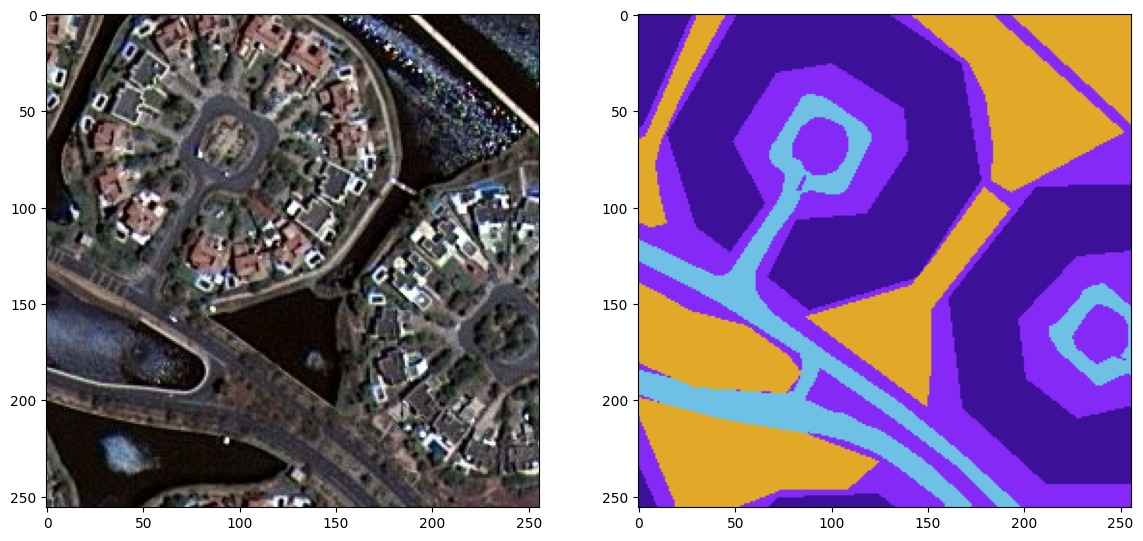

In [114]:
np.array(mask_dataset)
np.array(image_dataset)

random_image_id = np.random.randint(0, len(image_dataset))


plt.figure(figsize=(14,10))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [124]:
 class_building = "#3C1098"
 class_building = class_building.lstrip('#')

#3C 10 98

class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

[ 60  16 152]


In [125]:
  class_land = '#8429F6'
  class_land = class_land.lstrip('#')
  class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
  print(class_land)

[132  41 246]


In [126]:
class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

[110 193 228]


In [ ]:
class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

In [ ]:
class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

In [ ]:
class_unlabeled = "9B9B9B"
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)
